In [11]:
using Images
using Colors
using Statistics
using FileIO
using LinearAlgebra

In [2]:
# Some Governing Constants

im_dims = (100, 80)
typeof(image_resize_tuple)

LoadError: UndefVarError: image_resize_tuple not defined

In [32]:
# Function for getting an nxm matrix from an image path.

function get_bw_img_arry(path, im_dims)
    image = imresize(load(path), im_dims)

    chan = channelview(image)[1,:,:]
    return chan
end

function back_to_2d(image_arry, im_dims)
    return reshape(image_arry, im_dims)
end

function get_max_1(image_arry)
    return (image_arry/mean(image_arry))/2
end


get_max_1 (generic function with 1 method)

In [26]:
base_path = "images/nottingham/";
file = open(string(base_path,"filenames.txt"));
image_names = readlines(file);

In [27]:
images = zeros(length(image_names), im_dims[1], im_dims[2]);
average_face = zeros(im_dims)

for i = 1:length(image_names)
    global images[i,:,:] = get_bw_img_arry(string(base_path,image_names[i]), im_dims);
    global average_face += images[i,:,:]/length(image_names);
end

# Vectorizing

images = reshape(images, (size(images,1), im_dims[1]*im_dims[2]))

size(images)

(100, 8000)

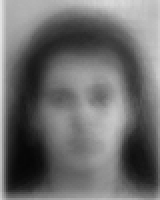

In [75]:
# Gray.(back_to_2d(images[2,:])) # Outputting the average face.
avg_face = sum(images, dims=1)/size(images, 1)
# avg_face = back_to_2d(avg_face, im_dims)
Gray.(back_to_2d(avg_face, im_dims))

Average face [1]: 0.8758431372549019
Average face [1]: 0.8758431372549019


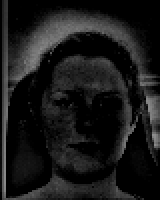

In [78]:
normed_faces = copy(images)

println("Average face [1]: ",avg_face[10])
avg_face = reshape(avg_face, (8000))
println("Average face [1]: ",avg_face[10])

for i = 1:size(images,1)
    normed_faces[i,:] = images[i,:]-avg_face
end

Gray.(back_to_2d(normed_faces[4,:], im_dims))

In [59]:
cov_mat = cov(normed_faces, dims=1)
size(cov_mat)

(8000, 8000)

In [60]:
F = eigen(cov_mat)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
8000-element Array{Float64,1}:
 -3.9592136237594926e-14
 -3.9481064036993756e-14
 -3.0445387611327004e-14
 -2.609248468206828e-14
 -2.4950414490227653e-14
 -1.6929487356258506e-14
 -1.3698660281143365e-14
 -9.54551878448245e-15
 -5.900261968480345e-15
 -4.943727556700156e-15
 -4.4414572235592764e-15
 -4.122142398844372e-15
 -3.933442154012103e-15
  ⋮
  7.748721300594935
  8.357863977452832
 11.197312645674094
 11.99584070167494
 16.112008346183455
 16.753418425787117
 21.324124927193445
 27.324727993875438
 28.93199981497125
 33.413302306648184
 46.64530157316015
 50.46073609769612
vectors:
8000×8000 Array{Float64,2}:
  0.0139104    -0.00366048   0.0184353   …   0.0146683    0.00380369
  0.00289497   -0.00661165  -0.00651868      0.014625     0.00337032
  0.0102023     0.0251866    0.0112676       0.0151797    0.00363294
  0.00576926   -0.0067819    0.00755553      0.014368     0.00361039
 -0.00882647   -0.0106958   -0.00

In [63]:
F.values

8000-element Array{Float64,1}:
 -3.9592136237594926e-14
 -3.9481064036993756e-14
 -3.0445387611327004e-14
 -2.609248468206828e-14
 -2.4950414490227653e-14
 -1.6929487356258506e-14
 -1.3698660281143365e-14
 -9.54551878448245e-15
 -5.900261968480345e-15
 -4.943727556700156e-15
 -4.4414572235592764e-15
 -4.122142398844372e-15
 -3.933442154012103e-15
  ⋮
  7.748721300594935
  8.357863977452832
 11.197312645674094
 11.99584070167494
 16.112008346183455
 16.753418425787117
 21.324124927193445
 27.324727993875438
 28.93199981497125
 33.413302306648184
 46.64530157316015
 50.46073609769612

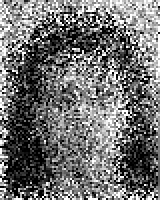

In [92]:
PCA_VIS = F.vectors[:,99]*30+avg_face

Gray.(back_to_2d(PCA_VIS, im_dims))